<a href="https://colab.research.google.com/github/NMashalov/2023_OpenMipt_course/blob/main/lesson5/%D0%94%D0%97_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 5

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash;  60 баллов





-----

In [ ]:
# Bot check

# HW_ID: phds_hw5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import time
from tqdm.notebook import tqdm
from collections import defaultdict

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import torch
from torch import nn
from torch.utils.data import Dataset, TensorDataset, \
                             DataLoader, RandomSampler, SequentialSampler

from IPython.display import clear_output
from pylab import rcParams

rcParams['figure.figsize'] = 15, 7
%matplotlib inline

sns.set(font_scale=1.3, palette='Set2')

#### **Профиль биология**

### Загрузка данных
В этом задании вы будете работать с данными о распространении COVID-19, их можно скачать [здесь](https://www.kaggle.com/datasets/gpreda/coronavirus-2019ncov). Мы будем предказывать показатель смертности, потому что способы измерения выздоровевших и заболевших разнятся между регионами.

 В данных представлены следующие столбцы:

* `Country/Region` &mdash; страна или регион,

* `Province/State` &mdash; город или населенный пункт,
* `Latitude` &mdash; географическая широта,
* `Longitude` &mdash; географическая долгота,
* `Confirmed` &mdash; кол-во подтвержденных случаев заболевания,
* `Recovered` &mdash; кол-во подтвержденных случаев выздоровления,
* `Deaths` &mdash; кол-во смертей,
* `Date` &mdash; дата.

Выгрузите датасет.

In [3]:
!pip install -q opendatasets

In [5]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/gpreda/coronavirus-2019ncov')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mashalovne
Your Kaggle Key: ··········


100%|██████████| 20.5M/20.5M [00:00<00:00, 88.9MB/s]


Установите в качестве индекса дату.

In [20]:
import pandas as pd
df = pd.read_csv('coronavirus-2019ncov/covid-19-all.csv')

<ipython-input-20-2e9d80f6466b>:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('coronavirus-2019ncov/covid-19-all.csv')


In [22]:
df.set_index('Date',inplace=True)

In [23]:
df.sample(20)

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths
Date,,,,,,,
2020-12-01,Colombia,Meta,3.272000,-73.087700,28438.0,26823.0,634.0
2020-11-18,US,South Dakota,43.895227,-99.852019,389.0,0.0,8.0
2020-10-30,Japan,Tochigi,36.689912,139.819213,487.0,461.0,1.0
2020-03-31,Libya,NaN,26.335100,17.228331,10.0,1.0,0.0
2020-07-15,US,West Virginia,40.273673,-80.579153,33.0,0.0,0.0
2020-07-30,Burma,NaN,21.916200,95.956000,353.0,295.0,6.0
2020-05-04,US,Wisconsin,45.027153,-88.268075,18.0,0.0,0.0
2020-05-02,US,New Mexico,36.508383,-108.320437,710.0,0.0,51.0
2020-08-29,US,South Dakota,43.193386,-100.719550,78.0,0.0,5.0


Избавьтесь от `None`, если они есть.

In [24]:
df.dropna(inplace=True)

Выберите страну и регион, где хотите предсказывать.

In [25]:
df_ukr = df.loc[df['Country/Region']=='Ukraine']

Удалите лишние столбцы в выбранных данных.

In [26]:
df_ukr

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths
Date,,,,,,,
2020-06-01,Ukraine,Cherkasy Oblast,49.4444,32.0598,406.0,308.0,16.0
2020-06-01,Ukraine,Chernihiv Oblast,51.4982,31.2893,177.0,63.0,6.0
2020-06-01,Ukraine,Chernivtsi Oblast,48.2917,25.9352,3377.0,945.0,144.0
2020-06-01,Ukraine,Crimea Republic*,45.2835,34.2008,385.0,229.0,3.0
2020-06-01,Ukraine,Dnipropetrovsk Oblast,48.4647,35.0462,942.0,265.0,21.0
...,...,...,...,...,...,...,...
2020-12-31,Ukraine,Vinnytsia Oblast,49.2331,28.4682,22500.0,15237.0,395.0
2020-12-31,Ukraine,Volyn Oblast,50.7472,25.3254,33016.0,28605.0,515.0
2020-12-31,Ukraine,Zakarpattia Oblast,48.6208,22.2879,28200.0,23526.0,637.0


Постройте графики заболевших, выздоровевших и количества смертей.

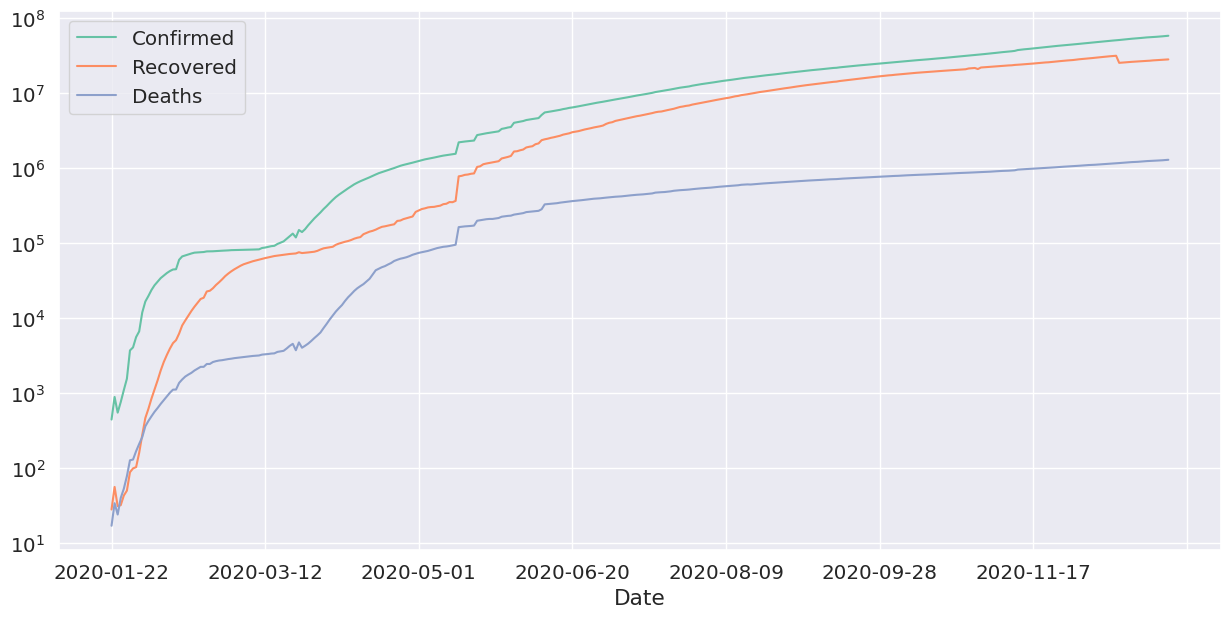

In [32]:
df_temp = df.groupby('Date')[['Confirmed','Recovered','Deaths']].sum().plot(logy=True)

## Модели и обучение

### Вспомогательные функции

Напишите класс датасета для данных в виде последовательности.

In [33]:
class TSDataset(torch.utils.data.Dataset):
    def __init__(self, data, timesteps):
        self.data = data
        self.timesteps = timesteps

    def __len__(self):
        return len(self.data) # количество подпоследовательностей заданной длины

    def __getitem__(self, index):
        return (self.timesteps[index], self.data[index]) # верните X и y

Здесь мы создаём функции для обучения, для вывода кривых обучения и для рекурсивного предсказания.

In [35]:
def plot_learning_curves(history):
    '''
    Функция для вывода лосса и метрики во время обучения.

    :param history: (dict)
        accuracy и loss на обучении и валидации.
    '''
    fig = plt.figure(figsize=(10, 5))
    plt.plot(history['loss'])
    plt.ylabel('Лосс')
    plt.xlabel('Эпоха')
    plt.show()


def train_ts_model(
    model,
    criterion,
    optimizer,
    train_batch_gen,
    num_epochs=50,
    device='cuda'
):
    '''
    Функция для обучения модели и вывода лосса во время обучения.

    :param model: обучаемая модель
    :param criterion: функция потерь
    :param optimizer: метод оптимизации
    :param train_batch_gen: генератор батчей для обучения
    :param num_epochs: количество эпох

    :return: обученная модель
    :return: (dict) loss на обучении ('история' обучения)
    '''
    history = defaultdict(list)

    for epoch in range(num_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        start_time = time.time()

        # Устанавливаем поведение dropout / batch_norm  в обучение
        model.train(True)

        # На каждой 'эпохе' делаем полный проход по данным
        for X_batch, y_batch in train_batch_gen:
            X_batch = X_batch.type('torch.FloatTensor').to(device)
            y_batch = y_batch.type('torch.FloatTensor').to(device)

            logits = model(X_batch)

            loss = criterion(logits.squeeze(), y_batch.squeeze())

            # подсчёт производных
            loss.backward()
            # шаг градиента
            optimizer.step()
            # зануление градиентов
            optimizer.zero_grad()

            train_loss += np.sum(loss.detach().cpu().numpy())

        # Подсчитываем лосс и сохраням в 'историю'
        train_loss /= len(train_batch_gen)
        history['loss'].append(train_loss)

        # clear_output()

        # Печатаем результаты после каждой эпохи
        print('Эпоха {} из {} выполнена за {:.3f} сек.'.format(
            epoch + 1, num_epochs, time.time() - start_time))
        print('  лосс: \t{:.6f}'.format(train_loss))
    plot_learning_curves(history)

    return model, history


def evaluate_ts_model(model, start_seq, test_data, scaler, return_all=False, device='cpu'):
    '''
    Функция для проверки качества модели на обучающем отрезке ряда.

    :param model: обучаемая модель,
    :param start_seq: обучающие данные для первого предсказания,
    :param test_data: тестовые данные.
    :param return_all: возвращать все предсказания или только для 1-го магазина

    :return: результаты предсказания.
    '''
    result = []
    model.train(False)
    input_tensor = torch.FloatTensor(start_seq).to(device).unsqueeze(0)

    with torch.no_grad():
        for i in range(len(test_data)):
            # делаем предсказание, а unsqueeze нужны, чтобы сделать размерность (1, 1, 1) вместо (1)

            logits = model(input_tensor[:, i:, :]).unsqueeze(0)#.unsqueeze(2)

            # присоединяем предсказанное значение к последовательности:
            #                        (1, timestep, 1) -> (1, 1, 1)   по оси 1
            input_tensor = torch.cat((input_tensor,        logits),       1    )

            # обратное преобразование к нормальным числам
            logits = scaler.inverse_transform(logits.cpu().numpy().squeeze(0))

            # результат сохраняем
            result.append(logits.squeeze())

    if return_all:
        return np.array(result)

    return np.array(result)

Создадим класс модели.

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_lstm_layers, use_pool=False):
        super(LSTM, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers  = num_lstm_layers
        self.input_size  = input_size

        self.lstm = nn.LSTM(
            self.input_size,
            self.hidden_size,

        ) # LSTM-модель с batch_first=True и dropout=0.2

        # Размерность пространства выхода последнего LSTM-слоя равна hidden_size.
        # Линейный слой нужен, чтобы преобразовать выход LSTM к нужному размеру output_size.
        self.fc = nn.Linear(self.hidden_size) # добавьте линейный слой

        # Пуллинг
        self.pool = <...> # добавьте усредняющий все выходы пуллинг-слой
        self.use_pool = use_pool


    def forward(self, input_seq):

        # инициализируем начальные скрытые состояния
        h_0 = torch.zeros(self.num_layers, input_seq.size(0), self.hidden_size).to(device=input_seq.device)
        c_0 = torch.zeros(self.num_layers, input_seq.size(0), self.hidden_size).to(device=input_seq.device)

        out, (_, _) = self.lstm(input_seq, (h_0, c_0))

        if self.use_pool:
            # берем среднее от векторов для всей последовательности
            out_to_fc = self.pool(out.transpose(1, 2)).squeeze(-1)
        else:
            # берем последний выходной вектор
            out_to_fc = out[:, -1, :]

        return self.fc(out_to_fc)

Напишем функцию для визуализации результатов предсказания.

In [ ]:
def plot_results(y_to_train, y_to_test=None, y_forecast=None):
    """
        Функция для визуализации временного ряда и предсказания.

        Параметры:
            - y_to_train: pd.Series
                Временной ряд, на котором обучалась модель.
            - y_to_test: pd.Series
                Временной ряд, который предсказывает модель.
            - y_forecast: array
                Предсказания модели.
            - plot_conf_int: bool
                Надо ли строить предсказательного интервал.
            - left_bound: array
                Левая граница предсказательного интервала.
            - right_bound: array
                Правая граница предсказательного интервала.
    """
    plt.figure(figsize=(15, 5))
    plt.plot(np.arange(len(y_to_train)), y_to_train, label='train')

    if y_to_test is not None:
        plt.plot(np.arange(len(y_to_train), len(y_to_train) + len(y_to_test)), y_to_test,  label='test')
        if y_forecast is not None:
            plt.plot(np.arange(len(y_to_train), len(y_to_train) + len(y_to_test)), y_forecast, label='prediction')
    plt.legend()
    plt.show()

#### **Профиль биология**


Разделим выборку на тест и трейн.

In [ ]:
test_time = pd.Timestamp('2020-12-01')
train_bio = <...>
test_bio = <...>

Посмотрим на то, что получилось.

In [ ]:
plot_results(train_bio, test_bio)

Преобразуем данные.

Зададим длину подпоследовательности, размер батча, девайс.

In [ ]:
timesteps = <...>
batch_size = <...>

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Преобразуйте к датасету с помощью нашего класса и сделайте генератор батчей.

Инициализируйте модель.

Обучите её.

Создадим предсказания на тесте.

Сравним предсказание с реальностью.

**Вывод**